Heart desies prediction..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../Data/heart.csv")
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.shape

(918, 12)

In [5]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

<Axes: xlabel='HeartDisease'>

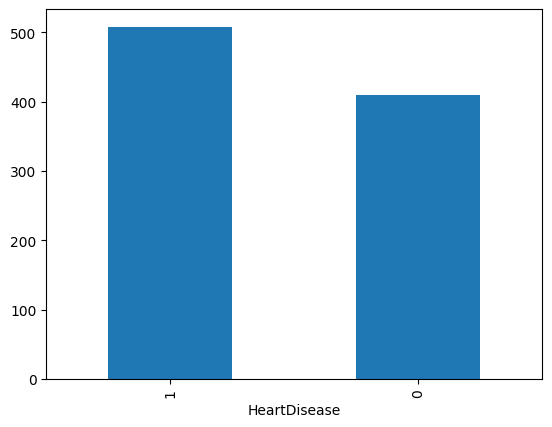

In [9]:
df['HeartDisease'].value_counts().plot(kind='bar')

In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

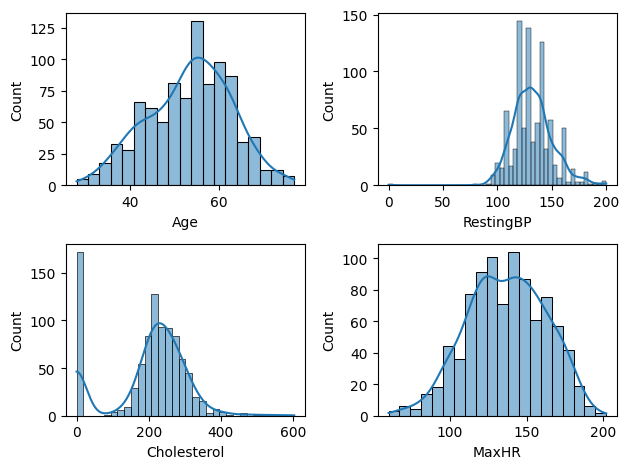

In [11]:
#Check distribution..

def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

plt.tight_layout()

In [12]:
df['RestingBP'].value_counts()

RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
101      1
117      1
192      1
129      1
164      1
Name: count, Length: 67, dtype: int64

In [13]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [14]:
#Remove 172 people with its mean in cholestrol..

cholestroel_mean = df.loc[df['Cholesterol'] != 0,'Cholesterol'].mean()

In [15]:
cholestroel_mean

np.float64(244.6353887399464)

In [16]:
df['Cholesterol'] = df['Cholesterol'].replace(0,cholestroel_mean)
df['Cholesterol'] = df['Cholesterol'].round(2)

In [17]:
#Now for restingBP. (same process)

restingBp_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()
df['RestingBP'] = df['RestingBP'].replace(0,restingBp_mean)
df['RestingBP'] = df['RestingBP'].round(2)

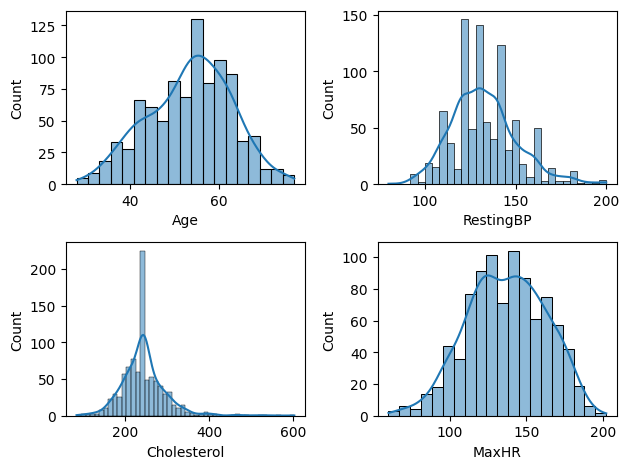

In [18]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)

plt.tight_layout()

In [19]:
df['Cholesterol'].value_counts()

Cholesterol
244.64    172
254.00     11
220.00     10
223.00     10
204.00      9
         ... 
353.00      1
278.00      1
157.00      1
176.00      1
131.00      1
Name: count, Length: 222, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

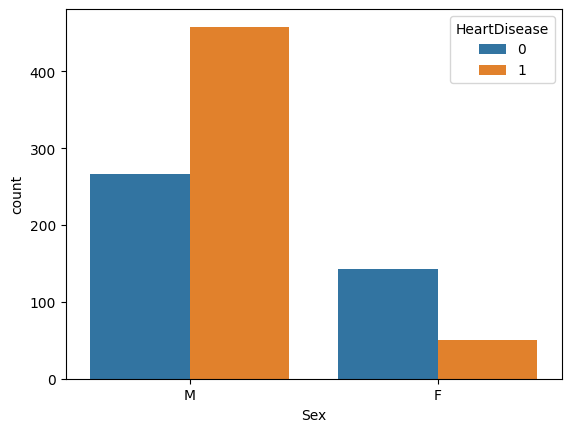

In [20]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

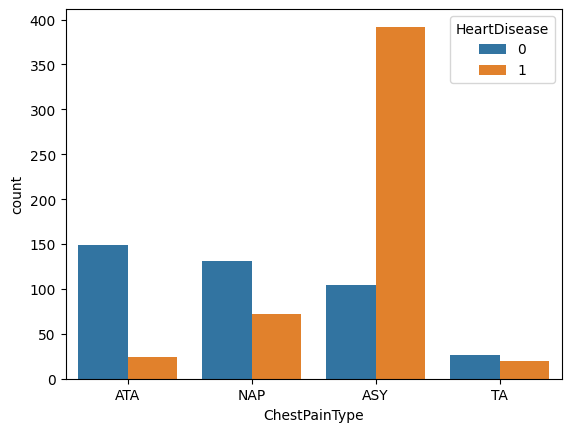

In [21]:
sns.countplot(x= df['ChestPainType'],hue= df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

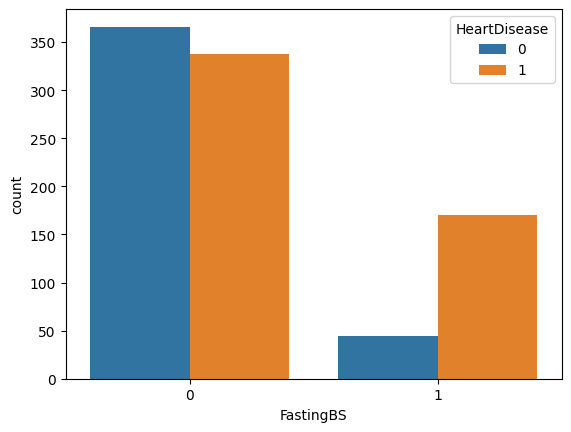

In [22]:
sns.countplot(x=df['FastingBS'],hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

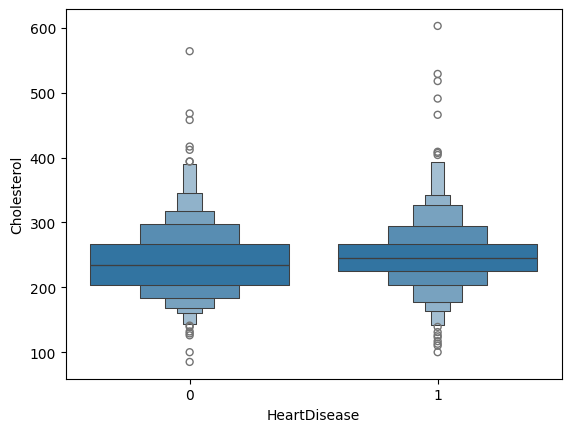

In [23]:
sns.boxenplot(x='HeartDisease',y='Cholesterol',data=df)

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

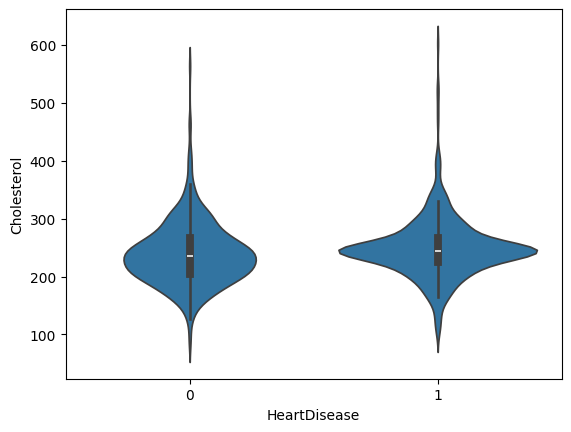

In [24]:
sns.violinplot(x= 'HeartDisease', y='Cholesterol',data=df)

<Axes: >

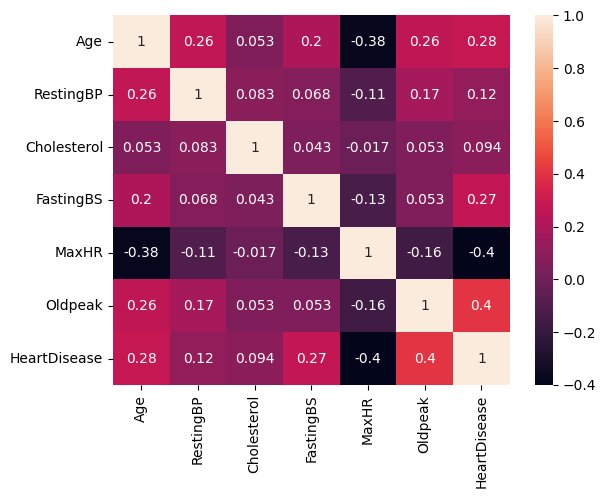

In [25]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

Data Procession..

In [26]:
df_encode = pd.get_dummies(df,drop_first=True)

In [27]:
df_encode.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40      140.0        289.0          0    172      0.0             0   
1   49      160.0        180.0          0    156      1.0             1   
2   37      130.0        283.0          0     98      0.0             0   
3   48      138.0        214.0          0    108      1.5             1   
4   54      150.0        195.0          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0   True               True              False             False   
1  False              False               True             False   
2   True               True              False             False   
3  False              False              False             False   
4   True              False               True             False   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0               True          False             False          False   
1               True          False             False           True   
2              False           True             False          False   
3               True          False              True           True   
4               True          False             False          False   

   ST_Slope_Up  
0         True  
1        False  
2         True  
3        False  
4         True

In [28]:
df_encode = df_encode.astype(int)
df_encode.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172        0             0   
1   49        160          180          0    156        1             1   
2   37        130          283          0     98        0             0   
3   48        138          214          0    108        1             1   
4   54        150          195          0    122        0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0      1                  1                  0                 0   
1      0                  0                  1                 0   
2      1                  1                  0                 0   
3      0                  0                  0                 0   
4      1                  0                  1                 0   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                  1              0                 0              0   
1                  1              0                 0              1   
2                  0              1                 0              0   
3                  1              0                 1              1   
4                  1              0                 0              0   

   ST_Slope_Up  
0            1  
1            0  
2            1  
3            0  
4            1

In [29]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

Model implemtation

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [31]:
X = df_encode.drop('HeartDisease',axis=1)
y = df_encode['HeartDisease']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Feature scaling

In [33]:
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(X_test)
x_train_scaled = scaler.fit_transform(X_train)

In [34]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Byeas": GaussianNB(),
    "Descision Tree":DecisionTreeClassifier(),
    "SVM":SVC()
}

In [35]:
result = []

In [36]:
for name,model in models.items():
    model.fit(x_train_scaled,y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    f1 =f1_score(y_test,y_pred)
    result.append({
        'model':name,
        'Accuracy':round(acc,4),
        "f1 score": round(f1,4)
    })


In [37]:
result

[{'model': 'Logistic Regression', 'Accuracy': 0.8696, 'f1 score': 0.8857},
 {'model': 'KNN', 'Accuracy': 0.8641, 'f1 score': 0.8815},
 {'model': 'Naive Byeas', 'Accuracy': 0.8533, 'f1 score': 0.8683},
 {'model': 'Descision Tree', 'Accuracy': 0.7772, 'f1 score': 0.8},
 {'model': 'SVM', 'Accuracy': 0.8478, 'f1 score': 0.8679}]

KNN performs best with 88 % accuracy..

To save our model to show as frontend we use Pickle ..

In [39]:
import joblib
joblib.dump(models['KNN'],'KNN_Heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']

Now frontend